In [1]:
from mbqc import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

np.set_printoptions(precision = 10,suppress = True,linewidth=np.inf)

In [2]:
# Derive the threshold of Pure Rydberg Decay
dlist = [5,7,9,11,13]
errorlist = np.array([0.03,0.032,0.034,0.0344,0.0348,0.0352,0.0356,0.036,0.0364,0.0368,0.0372,0.0376,0.038,0.04])
nshot = int(1e5)
lerlist = np.zeros([2,5,14])
lerlist_raw = np.zeros([5,14])

for i in range(5):
    d = dlist[i]
    for j in range(14):
        error = errorlist[j]
        mbqc_pure_decay = MBQC(d,error)
        result = mbqc_pure_decay.logical_parallel(nshot)
        ler,deriviation = get_pfail(result[1],result[0])
        lerlist_raw[i,j] = raw_data(result)
        lerlist[0,i,j] = ler
        lerlist[1,i,j] = deriviation

print(lerlist_raw)
print(lerlist[0])
print(lerlist[1])

[[0.01971 0.02736 0.03782 0.04004 0.04199 0.04508 0.04725 0.05084 0.05431 0.05669 0.06116 0.06365 0.06754 0.08608]
 [0.01013 0.01816 0.02939 0.03283 0.03599 0.03929 0.04457 0.04695 0.0513  0.05645 0.06126 0.06496 0.07053 0.10198]
 [0.00582 0.01257 0.02531 0.02761 0.03183 0.03585 0.03935 0.04458 0.05    0.05657 0.06133 0.06874 0.07652 0.12353]
 [0.00322 0.00834 0.01986 0.02319 0.02779 0.03213 0.03716 0.04403 0.05233 0.05771 0.06663 0.07443 0.0832  0.14589]
 [0.00177 0.00573 0.01649 0.0205  0.02499 0.02986 0.0349  0.04296 0.05056 0.05889 0.06844 0.08058 0.09384 0.17145]]
[[0.0197341299 0.0273877387 0.0378443858 0.040064389  0.0420144355 0.0451069606 0.047274495  0.0508645513 0.0543369985 0.0567146154 0.0611858189 0.0636746998 0.0675622288 0.0861024623]
 [0.0101565229 0.0181841173 0.0294188724 0.0328542901 0.0360143412 0.0393143871 0.0445949004 0.0469744887 0.0513245308 0.0564720984 0.0612846685 0.0649862721 0.0705522788 0.1020026599]
 [0.0058464213 0.0125983966 0.025337026  0.0276375436 

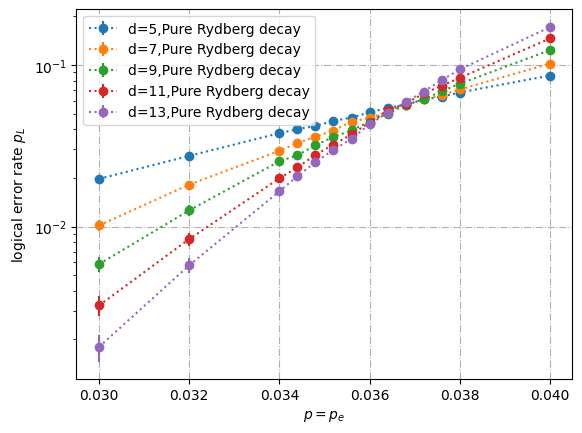

In [3]:
figure,ax = plt.subplots()
for i in range(len(dlist)):
    ax.errorbar(errorlist,lerlist[0,i,:],lerlist[1,i,:],fmt = 'o:',label = 'd=%d,Pure Rydberg decay'%(dlist[i]))
ax.set_xlabel('$p=p_e$')
ax.set_ylabel('logical error rate $p_L$')
ax.set_yscale('log')
ax.legend()
plt.grid(linestyle='-.',alpha = 1)

In [4]:
lerlist_threshold = lerlist[0,1:5,2:-2]
fit_threshold(errorlist[2:-2],lerlist_threshold)

In [6]:
# Derive the threshold of Pure Rydberg Decay
d = 3
pref = 0.0365
errorlist3 = np.logspace(-1,-0.5,21)*pref
nshot = int(1e7)

lerlist_dis_3 = np.zeros([21])

for j in range(21):
    error = errorlist3[j]
    mbqc_pure_decay = MBQC(d,error)
    result = mbqc_pure_decay.logical_parallel(nshot)
    lerlist_dis_3[j] = raw_data(result)

print(lerlist_dis_3)

errorlog3 = np.linspace(-1,-0.5,21)
ler_dis_3log = np.log10(lerlist_dis_3).reshape(len(errorlist3))
slope_d3,intercept_d3,r_value_d3,p_value_d3,std_err_d3 = linregress(errorlog3,ler_dis_3log)

print(slope_d3,intercept_d3,r_value_d3,p_value_d3,std_err_d3)


[0.0000592 0.0000719 0.000082  0.0000937 0.000117  0.0001326 0.0001623 0.0001981 0.0002397 0.0002822 0.0003456 0.0004008 0.0004898 0.0005628 0.0006785 0.0008096 0.0009577 0.0011519 0.0013797 0.0016343 0.0019505]
3.0570630802933305 -1.1809949374912843 0.999805415248701 7.2919741357810036e-34 0.013837587715260278


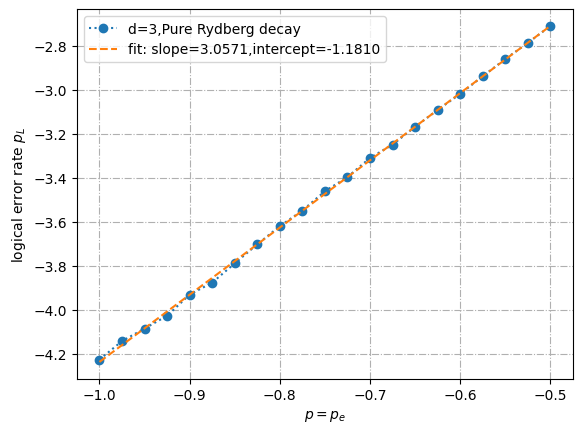

In [7]:
figure,ax = plt.subplots()
ax.plot(errorlog3,ler_dis_3log,'o:',label = 'd=3,Pure Rydberg decay')
ax.plot(errorlog3,slope_d3*errorlog3+intercept_d3,'--',label = 'fit: slope=%.4f,intercept=%.4f'%(slope_d3,intercept_d3))
ax.set_xlabel('$p=p_e$')
ax.set_ylabel('logical error rate $p_L$')

ax.legend()
plt.grid(linestyle='-.',alpha = 1)